# Salary Prediction Demo 02

We have the clean data; accounting for basic aspects of data quality
- Type consistency


As well are more bespoke aspects
- Reduce class imbalance


In [1]:
import os
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from helper import load_data
import seaborn

def describe_feature(x): 
    v = df_meta[df_meta['Var'] == x]['Description'].values
    if len(v) == 0:
        return ''
    else:
        return v[0]

In [2]:
df_meta, all_codes = load_data(r"/Users/tom.jubb/Documents/data/us_census/", verbose=False)

In [3]:
df = pd.read_csv('us_census_data_cleaned_5.csv').drop('Unnamed: 0', axis=1)

In [4]:
df.head(5)

AGE  ANCSTRY1  ANCSTRY2  CITIZEN                                    CLASS  \
0   43        50       999     True                           Fed. Gov. Emp.   
1   20        50        32     True  Emp. of a Private for Profit Company or   
2   19        50        32     True  Emp. of a Private for Profit Company or   
3   27       148       999     True  Emp. of a Private for Profit Company or   
4   23       935       999     True  Emp. of a Private for Profit Company or   

   DEPART  DISABL1  ENGLISH  FEB55  FERTIL  ...  WORKLWK  WWII  YEARSCH  \
0     260        2        0      0       0  ...     True     0       15   
1     470        2        0      0       1  ...     True     0       11   
2     685        2        0      0       1  ...     True     0       11   
3     540        2        0      0       0  ...     True     0       14   
4    1350        2        0      0       1  ...     True     0       14   

   YRSSERV                YEARSCH_CAT  \
0        4             Masters Degree   
1        0  Some Coll., But No Degree   
2        0  Some Coll., But No Degree   
3        0           Bachelors Degree   
4        0           Bachelors Degree   

                                           OCCUP_JOB  \
0  Administrators and officials, public administr...   
1                                  Pharmacists (301)   
2                      Sales workers, apparel (4346)   
3  Sales representatives, mining, manufacturing, ...   
4                             Registered nurses (29)   

                                           OCCUP_SUM  \
0  MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS   
1  MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS   
2  TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT O...   
3  TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT O...   
4  MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS   

                                           OCCUP_MAJ  \
0  Executive, Administrative, and Managerial Occu...   
1                 Professional Specialty Occupations   
2                                  Sales Occupations   
3                                  Sales Occupations   
4                 Professional Specialty Occupations   

                                        INDUSTRY_CAT  \
0           Administration of economic programs (96)   
1                                  Drug stores (591)   
2  Apparel and accessory stores, except shoe (56,...   
3                          Beverage industries (208)   
4                                    Hospitals (806)   

                        INDUSTRY_SUM  
0              PUBLIC ADMINISTRATION  
1                       RETAIL TRADE  
2                       RETAIL TRADE  
3                      MANUFACTURING  
4  PROFESSIONAL AND RELATED SERVICES  

[5 rows x 59 columns]

One aspect we need to pay attention to is what tpye of data is in each feature, categorical vs continuous

In [5]:
num_cols = [
    'AGE',
    'YEARWRK',
    'FERTIL',
    'HOUR89',
    'HOURS',
    'RIDERS',
    'WEEK89', 
    'TRAVTIME',
    'YRSSERV',
    'REARNING',
    'INCOME1',
    'PWGT1',
    'DEPART',
    'RIDERS',
]

# cats = [
#     'OCCUP',
#     'OCCUP_JOB',
#     'OCCUP_SUM',
#     'OCCUP_MAJ',
#     'INDUSTRY',
#     'RACE',
#     'SEX',
#     'ENGLISH',
#     'FERTIL',
#     'WWII',
#     'SCHOOL',
#     'MARITAL',
#     'MEANS',
#     'MILITARY',
#     'CITIZEN',
#     'YEARSCH',
#     'CLASS',
# #     'SEPT80',
#     'POWSTATE',
#     'VIETNAM',
#     'KOREAN'
# ]

In [6]:
for x in list(df.columns):
    try:
        print(f"{x:<20} - {describe_feature(x)}")
    except:
        print(x)

AGE                  - Age
ANCSTRY1             - Ancestry First Entry See Appendix I Ance
ANCSTRY2             - Ancestry Second Entry See Appendix I Anc
CITIZEN              - Citizenship
CLASS                - Class of Worker
DEPART               - Time of Departure for Work Hour and Minu
DISABL1              - Work Limitation Stat.
ENGLISH              - Ability to Speak English
FEB55                - Served February 1955 July 1964
FERTIL               - No. of Chld. Ever Born
HISPANIC             - Detailed Hispanic Origin Code See Append
HOUR89               - Usual Hrs. Worked Per Week Last Yr. 1989
HOURS                - Hrs. Worked Last Week
IMMIGR               - Yr. of Entry
INDUSTRY             - Ind. See Appendix I Ind..lst
KOREAN               - Served Korean Conflict June 1950 January
LANG1                - Language Other Than English At Home
LANG2                - Language Spoken At Home See Appendix I L
MARITAL              - Marital Stat.
MAY75880             - Served

## 1.1 EDA : Inspect Target Variable

Summary statistics are useful to understand some basic information

In [7]:
# mean salary
print(fr"Average Salary USA 1990: ${df['REARNING'].mean():.0f}")

Average Salary USA 1990: $22732


In [8]:
# variance in salary is very large
print(fr"Average Salary USA 1990: ${df['REARNING'].mean():.0f} +/- ${df['REARNING'].std():.0f}")

Average Salary USA 1990: $22732 +/- $23925


A better way to visualize this is with a histogram

Text(0, 0.5, 'Frequency (noramlized)')

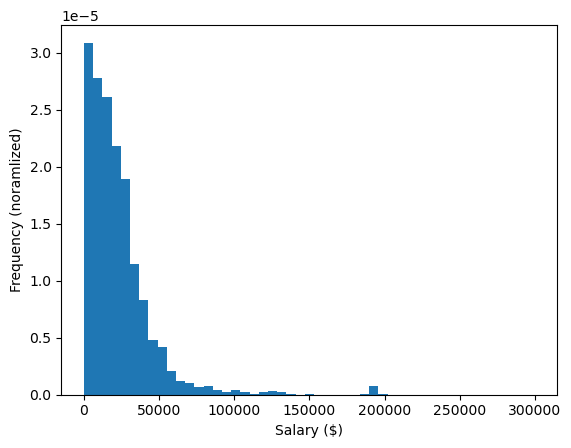

In [9]:
# histogram of mean wage per occupation
_ = plt.hist(df['REARNING'], density=1, bins = np.linspace(0,300000,50))
plt.xlabel(r"Salary ($)")
plt.ylabel(r"Frequency (noramlized)")

## 1.2 EDA :  Explore how input features influence target variable

- EDA will uncover ways to further clean data (one of the common feedback loops in ML)
- It is these relationships that ML will exploit to find the best predictions of salary

Text(0, 0.5, 'Frequency (noramlized)')

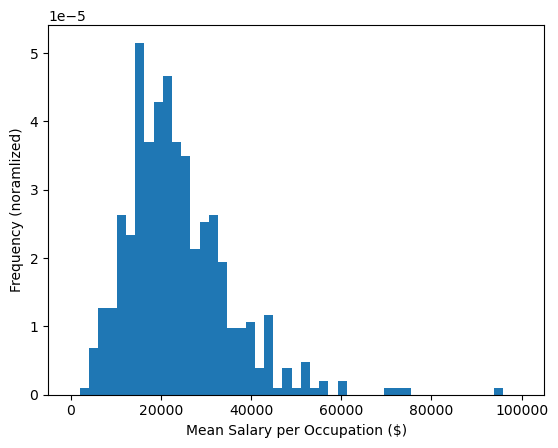

In [32]:
# histogram of mean wage per occupation
_ = plt.hist(df[['OCCUP', 'REARNING']].groupby('OCCUP').mean(),
            np.linspace(0,100000,50), density=1)
plt.xlabel(r"Mean Salary per Occupation ($)")
plt.ylabel(r"Frequency (noramlized)")

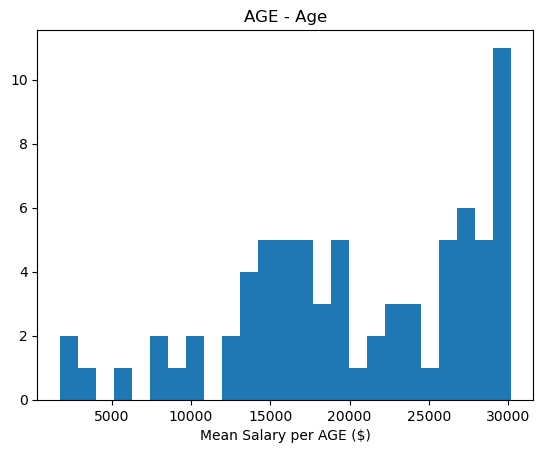

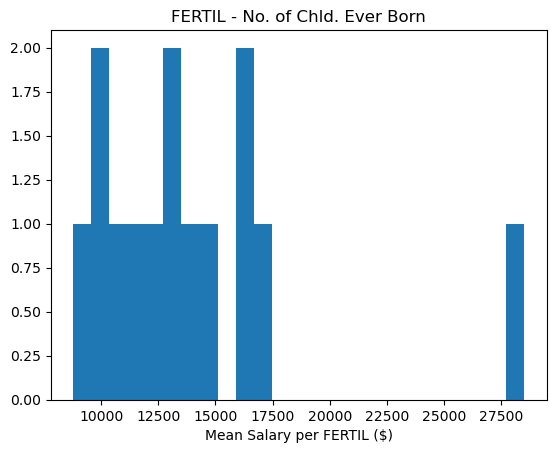

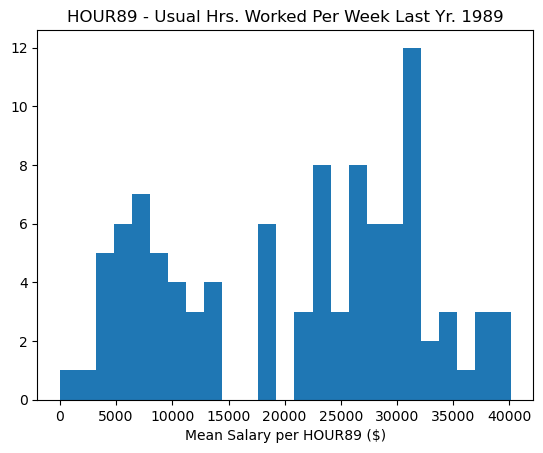

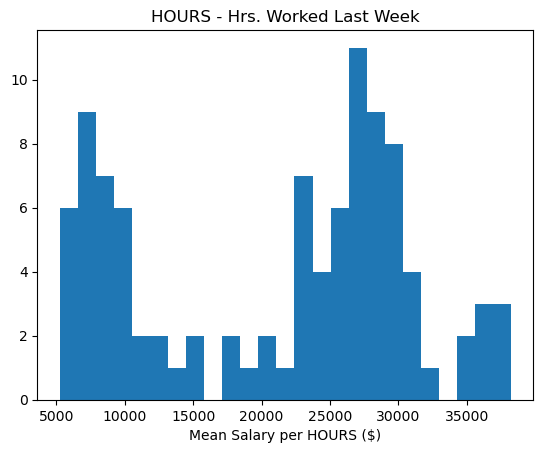

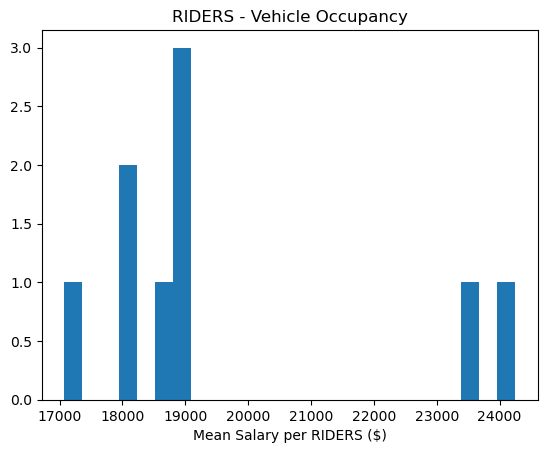

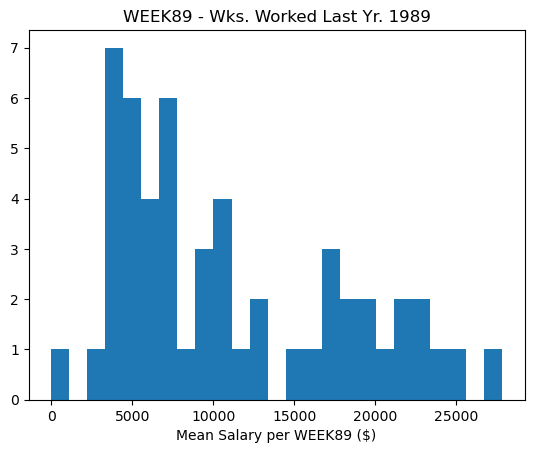

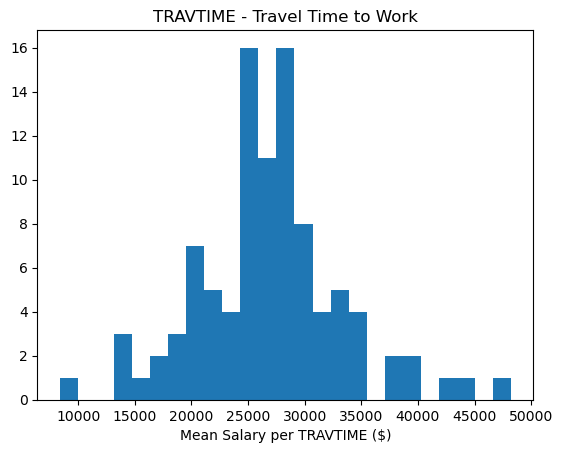

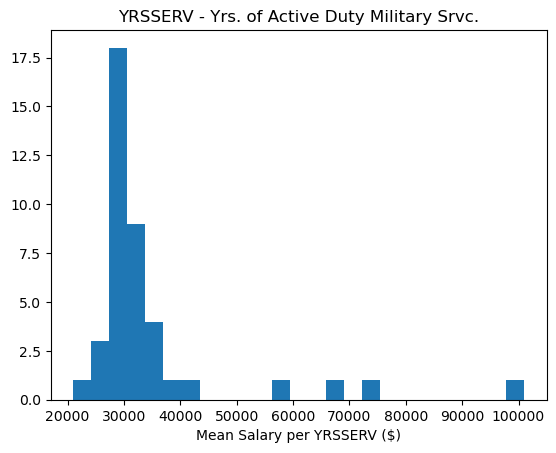

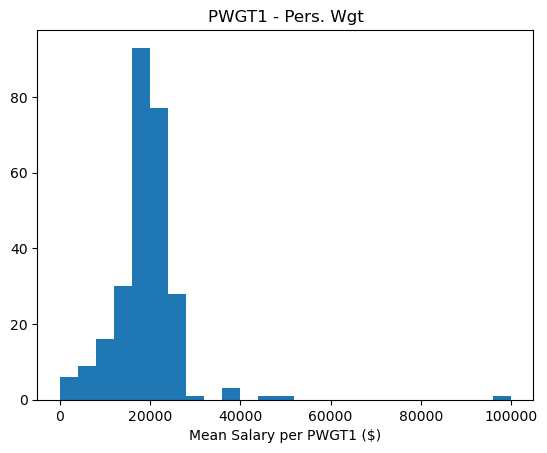

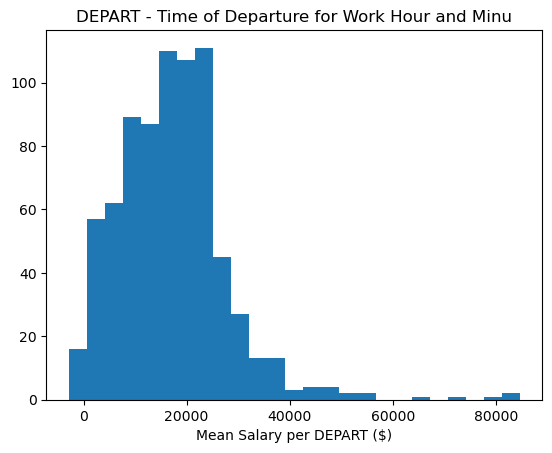

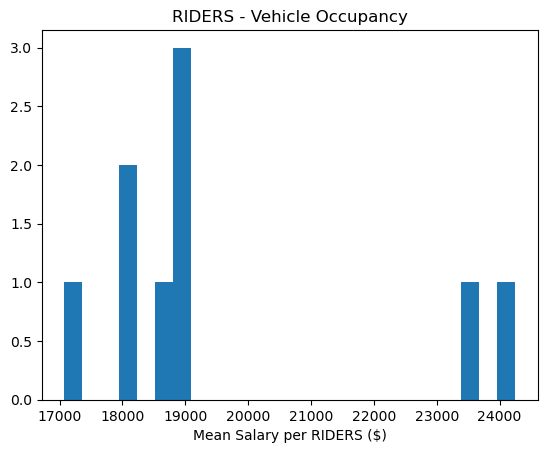

In [36]:
# histogram of mean wage per occupation
for var in num_cols:
    if var == 'REARNING' or var not in df.columns:
        continue
    _ = plt.hist(df[[var, 'REARNING']].groupby(var).mean(), bins=25)
    plt.title(f"{var} - {describe_feature(var)}")
    plt.xlabel(fr"Mean Salary per {var} ($)")
    plt.show()

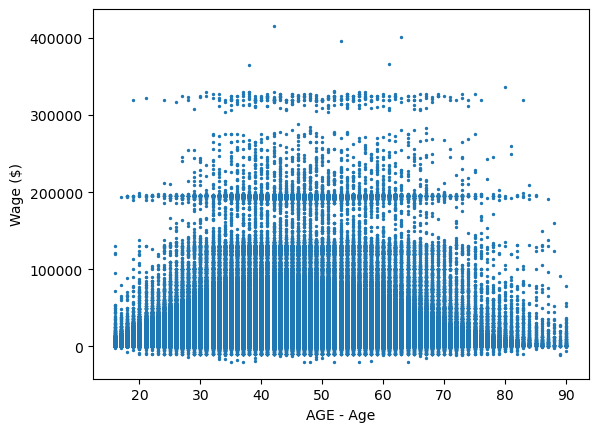

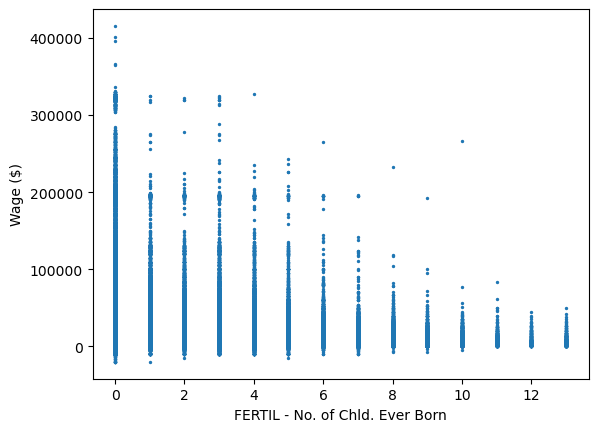

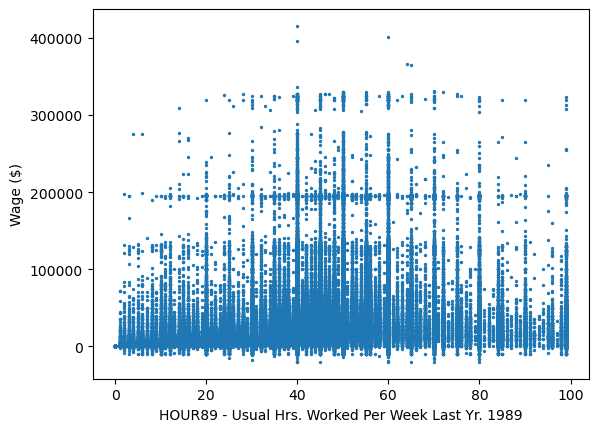

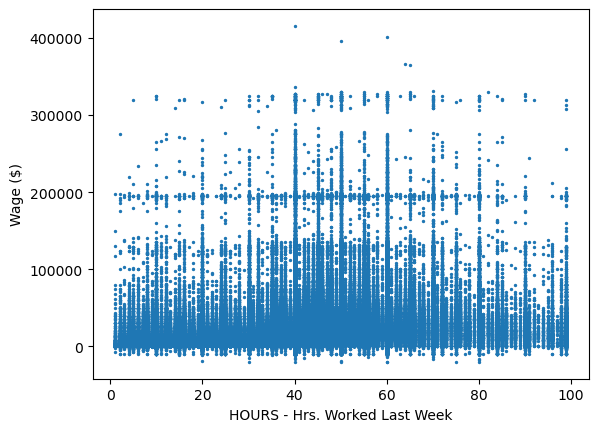

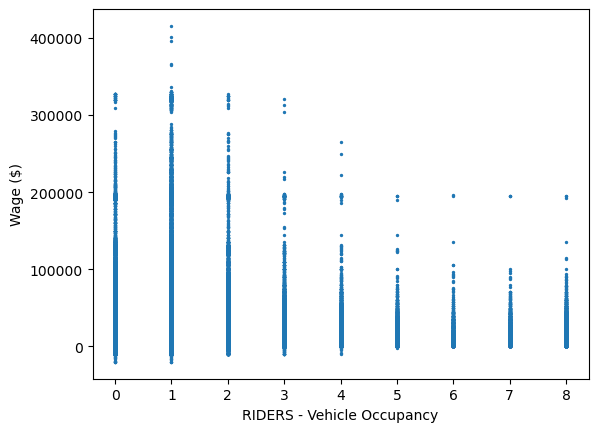

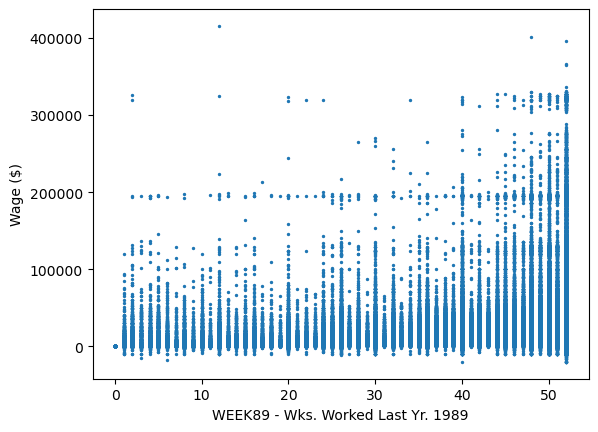

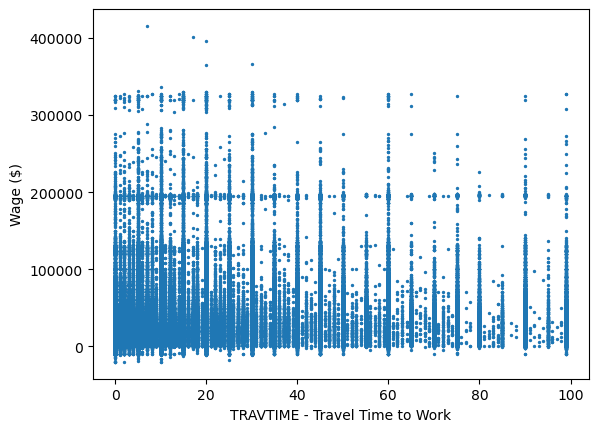

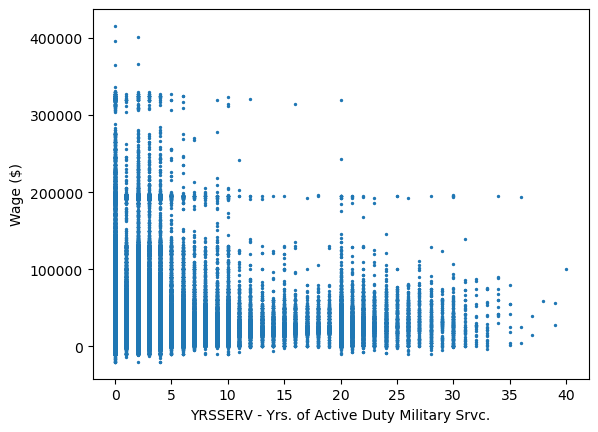

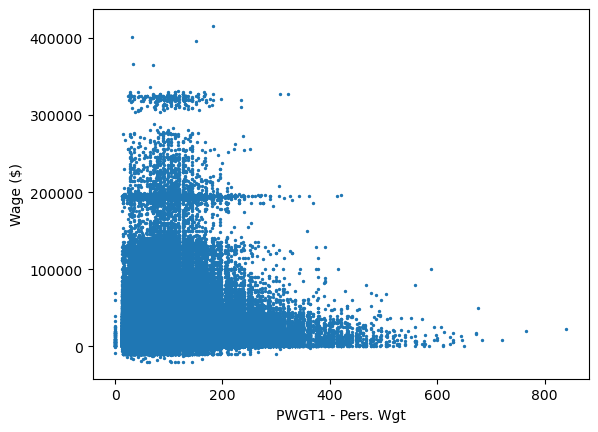

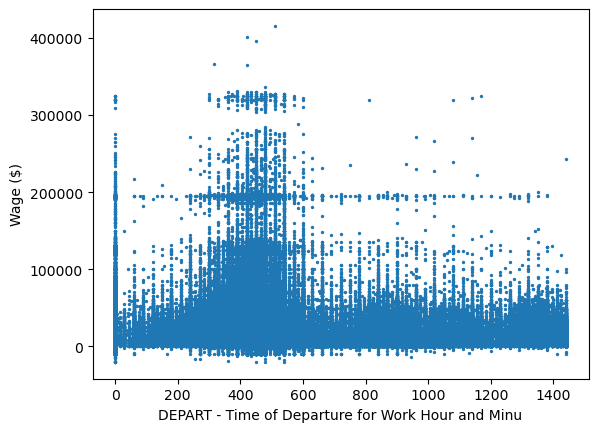

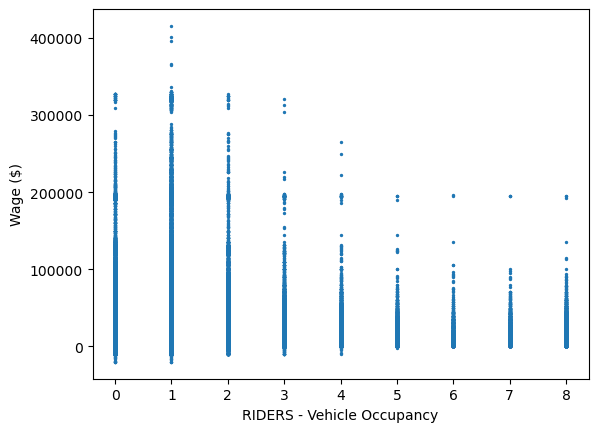

In [37]:
for var in num_cols:
    if var == 'REARNING' or var not in df.columns:
        continue
    _ = plt.scatter(df[var].values, df['REARNING'], s=2)
    plt.xlabel(f"{var} - {describe_feature(var)}")
    plt.ylabel(r"Wage ($)")
    plt.show()

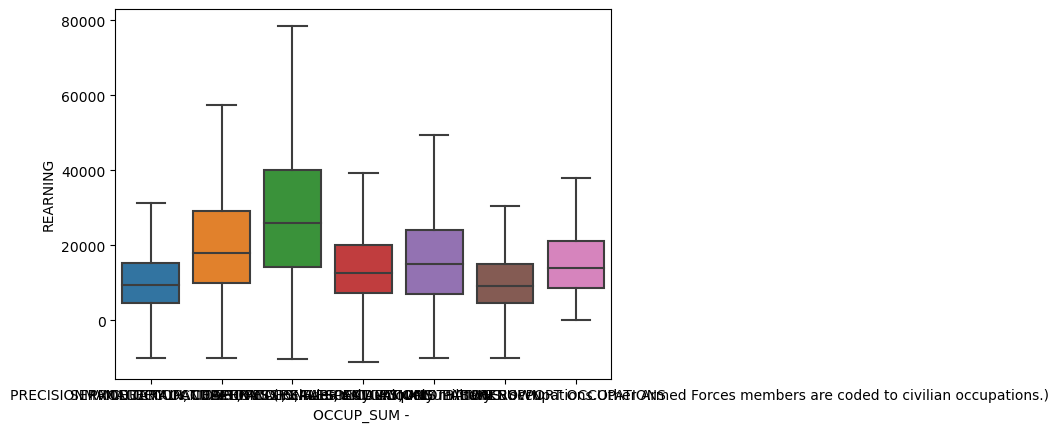

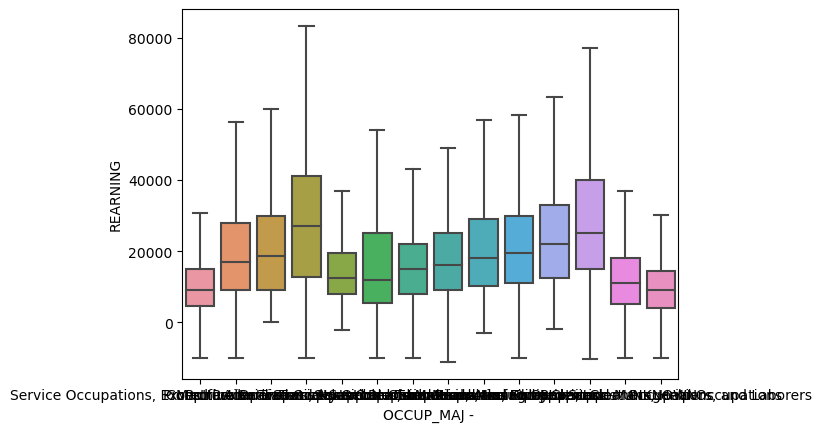

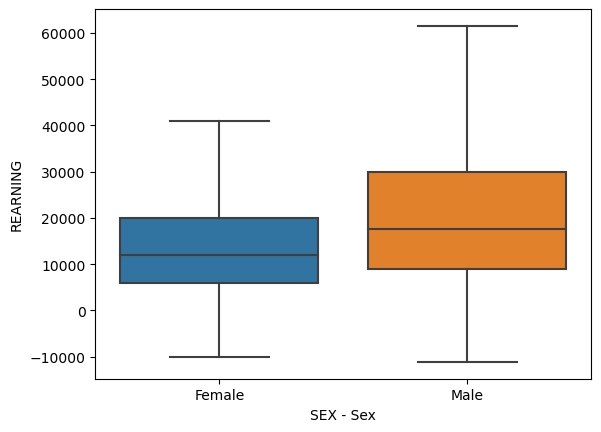

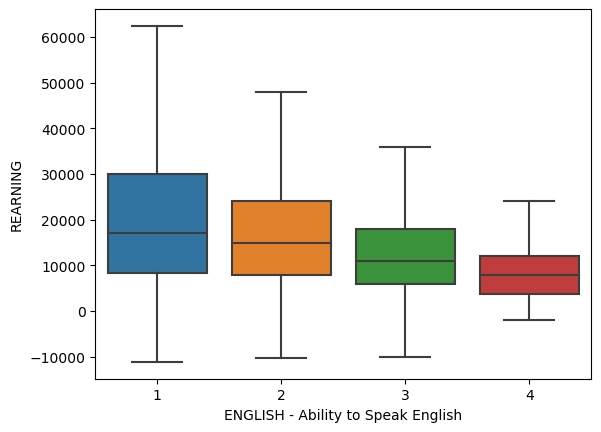

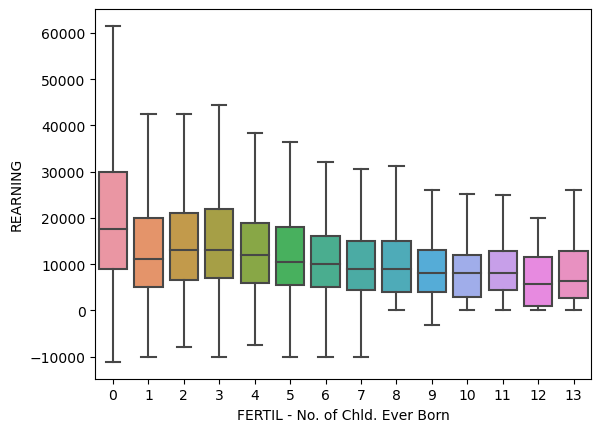

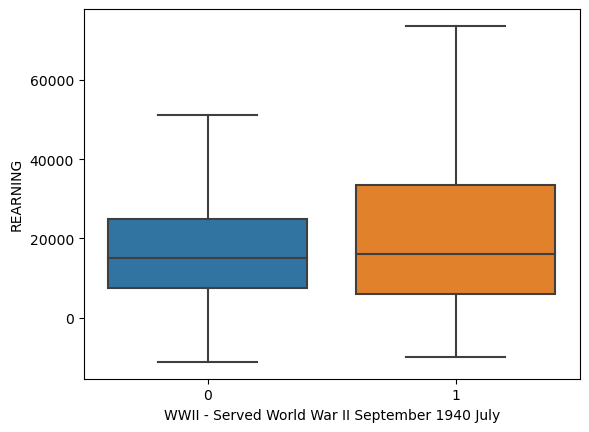

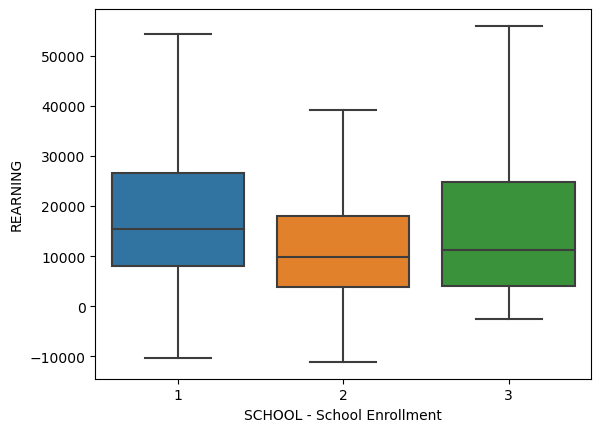

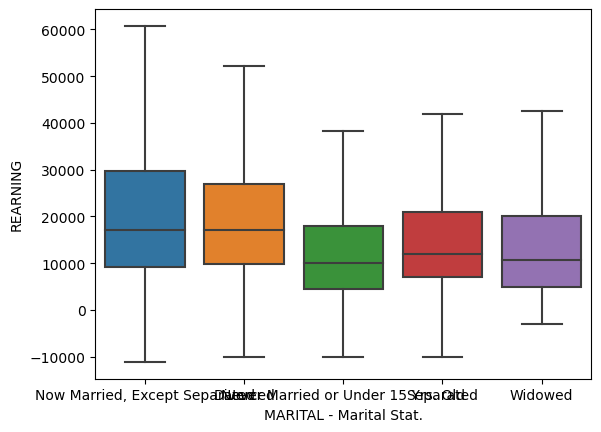

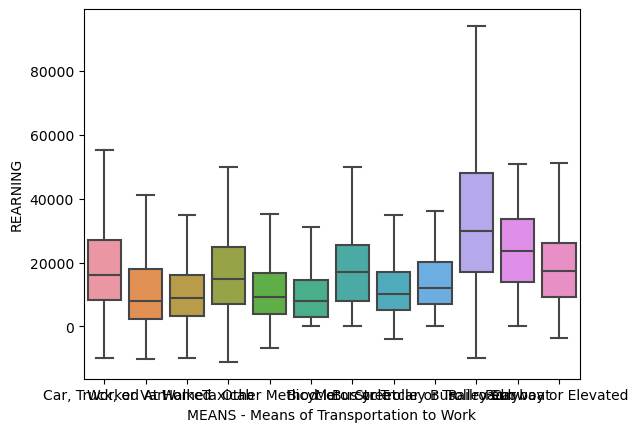

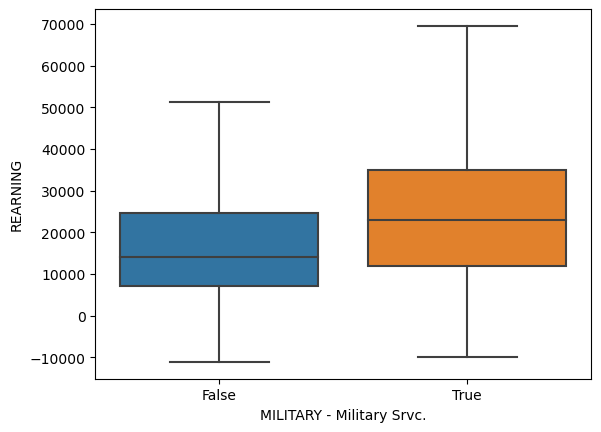

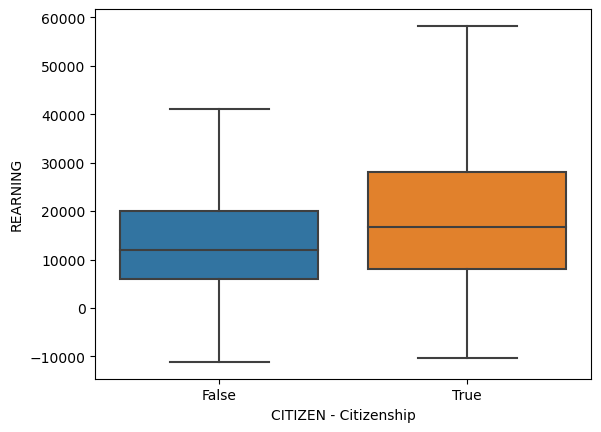

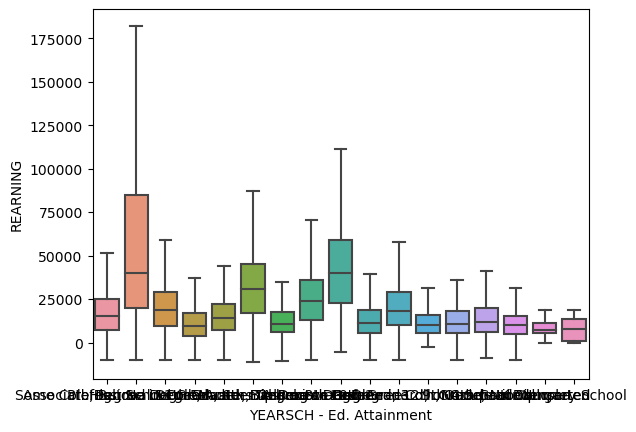

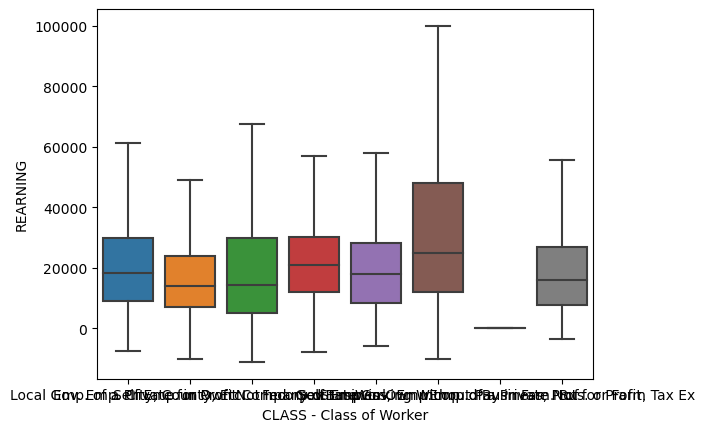

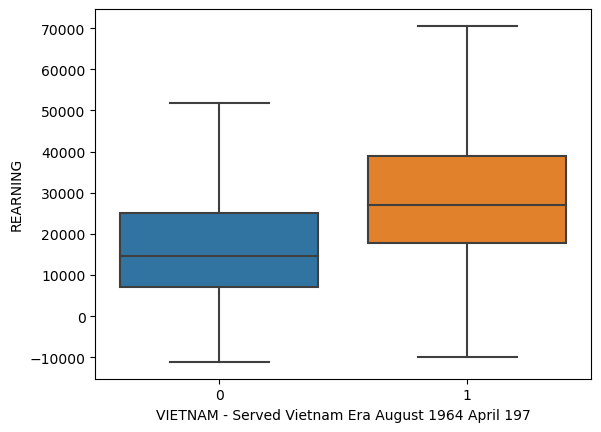

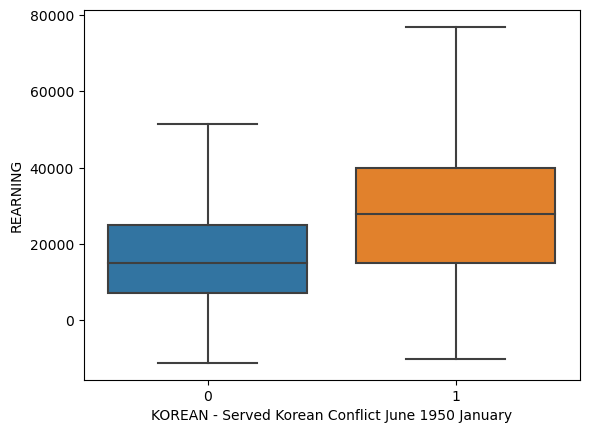

In [45]:
for var in cats:
    cardinality = len(df[var].unique())
    if cardinality > 50:
        continue
    seaborn.boxplot(x =var,
                    y ='REARNING',
                    data = df[[var, 'REARNING']],
                    orient="v",
                    showfliers = False)
    plt.xlabel(f"{var} - {describe_feature(var)}")
    plt.show()

## 1.3 Data Insights 

This is not strictly necessary for ML; however deriving interesting or useful insights from data serves a number of purposes

- Can be presented at a high level to show results from all the effort in data cleaning
- To sanity check the data

### 1.3.1 Highest Paid Jobs

In [41]:
# list all the jobs
#df['OCCUP_JOB'].unique()

In [49]:
# how mnay judges are there?
df_tmp = df[['OCCUP_JOB','PWGT1', 'REARNING']]
n_judges = df_tmp[df_tmp['OCCUP_JOB'] == "Judges (212)"]['PWGT1'].sum()
print(fr"Number of Judges  : {n_judges:.0f}")

# how mnay lawyers are there?
df_tmp    = df[['OCCUP_JOB','PWGT1','REARNING']]
n_lawyers = df_tmp[df_tmp['OCCUP_JOB'] == "Lawyers (211)"]['PWGT1'].sum()
print(fr"Number of Lawyers : {n_lawyers:.0f}")

Number of Judges  : 33112
Number of Lawyers : 713176


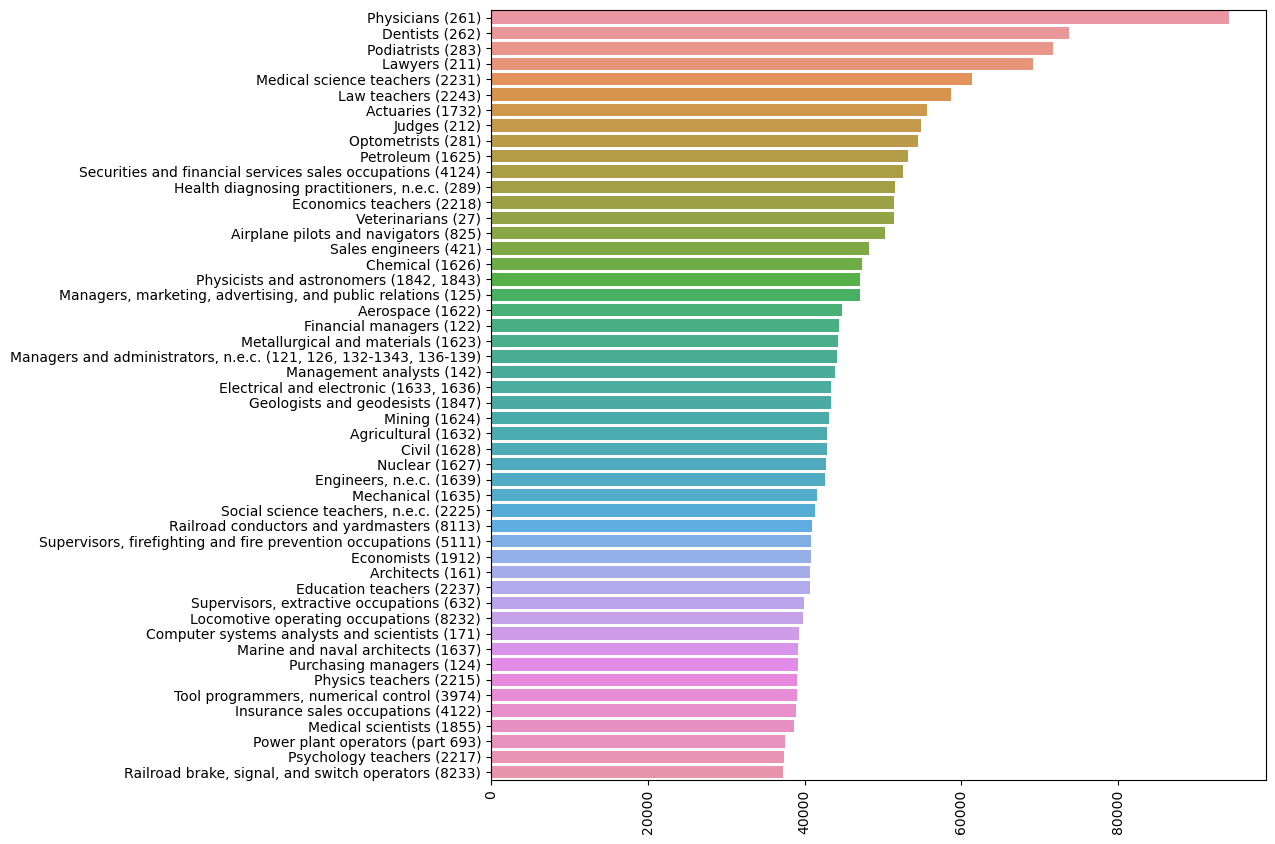

In [51]:
pd.options.mode.chained_assignment = None
gb = df[['OCCUP_JOB','PWGT1', 'REARNING']]

gb['count']     = gb['PWGT1'].astype(int)
gb['OCCUP_JOB'] = gb['OCCUP_JOB'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('OCCUP_JOB').sum()

min_thresh = gb.sum()['count'] > 1000
gb = gb[gb['count'] > 1000]

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']

df_plot = gb.reset_index().reindex().sort_values('REARNING', ascending=False)

df_plot = df_plot.reset_index().drop('index', axis=1)#.iloc[-100:,:]

fig, ax = plt.subplots(1,1,figsize=(10,10))

seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[:50].astype('str'), 
                x=df_plot['REARNING'].values[:50],
                orient="h")
_ = plt.xticks(rotation=90) 

In [80]:
gb          = df[['OCCUP_JOB', 'REARNING']].copy()
gb['count'] = 1
gb          = gb.groupby('OCCUP_JOB')

df_plot = gb.mean()[gb.sum()['count']>500].reset_index().reindex().sort_values('REARNING', ascending=False)
df_plot = df_plot.reset_index().drop('index', axis=1)

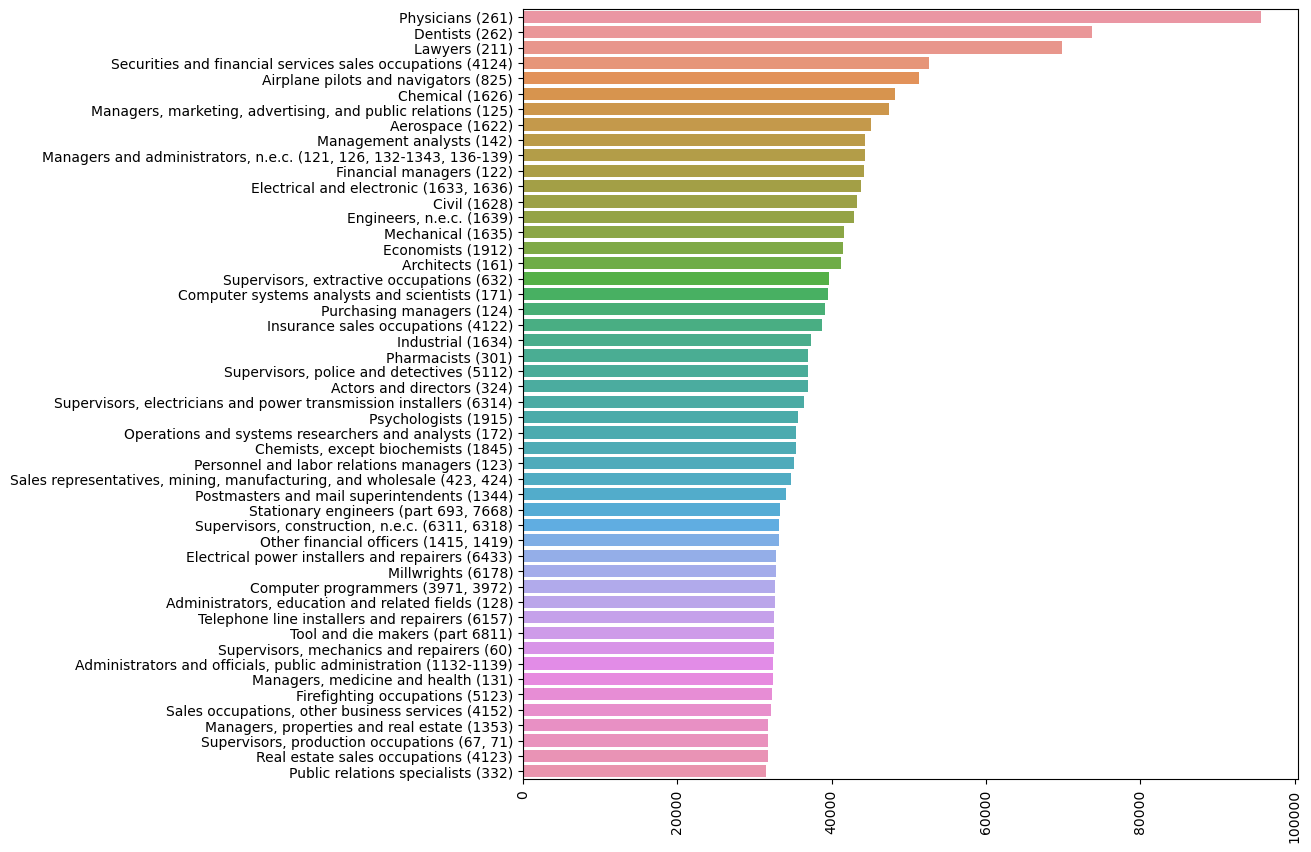

In [81]:
top_k = 50
fig, ax = plt.subplots(1,1,figsize=(10,10))
seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[:top_k].astype('str'), 
                x=df_plot['REARNING'].values[:top_k],
                orient="h")
_ = plt.xticks(rotation=90) 

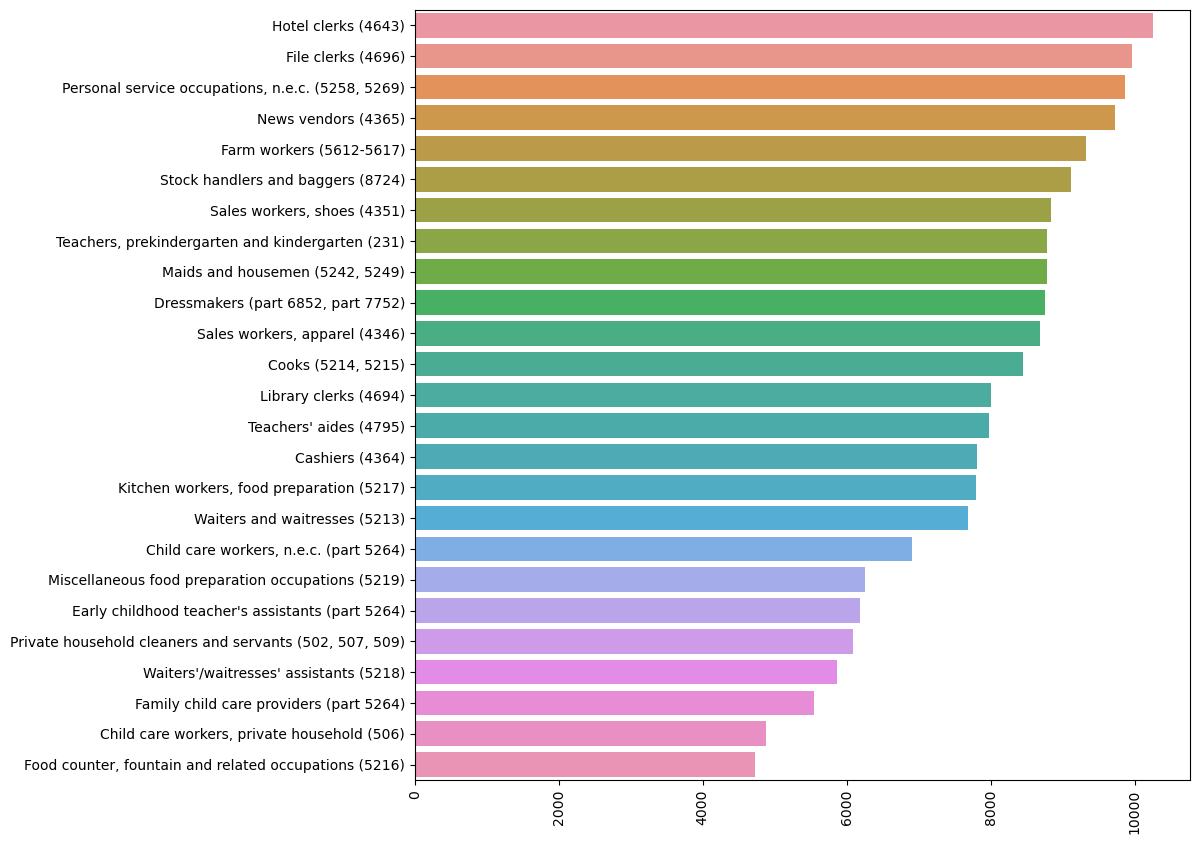

In [82]:
bottom_k = 25
fig, ax = plt.subplots(1,1,figsize=(10,10))
seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[-bottom_k:].astype('str'), 
                x=df_plot['REARNING'].values[-bottom_k:],
                orient="h")
_ = plt.xticks(rotation=90) 

### 1.3.2 Average Pay vs Education

In [53]:
all_codes['YEARSCH']

{'00': 'N/a Less Than 3 Yrs. Old',
 '01': 'No School Completed',
 '02': 'Nursery School',
 '03': 'Kindergarten',
 '04': '1st, 2nd, 3rd, or 4th Grade',
 '05': '5th, 6th, 7th, or 8th Grade',
 '06': '9th Grade',
 '07': '10th Grade',
 '08': '11th Grade',
 '09': '12th Grade, No Diploma',
 '10': 'High School Graduate, Diploma or Ged',
 '11': 'Some Coll., But No Degree',
 '12': 'Associate Degree in Coll., Occupational',
 '13': 'Associate Degree in Coll., Academic Prog',
 '14': 'Bachelors Degree',
 '15': 'Masters Degree',
 '16': 'Professional Degree',
 '17': 'Doctorate Degree'}

In [60]:
print(fr"No doctorate                     : ${df[df['YEARSCH'] != 17]['REARNING'].mean():.2f}")
print(fr"A Degree                         : ${df[df['YEARSCH'] >= 12]['REARNING'].mean():.2f}")
print(fr"Professional Degree or Doctorate : ${df[df['YEARSCH'] >= 16]['REARNING'].mean():.2f}")

No doctorate                     : $22486.65
A Degree                         : $33670.08
Professional Degree or Doctorate : $60954.39


### 1.3.3 Best place to live for salary

In [63]:
all_codes['POWSTATE']

{'00': 'N/a Not a Worker Not in the Labor Force,',
 '01': 'Alabama',
 '02': 'Alaska',
 '04': 'Arizona',
 '05': 'Arkansas',
 '06': 'California',
 '08': 'Colorado',
 '09': 'Connecticut',
 '10': 'Delaware',
 '11': 'District of Columbia',
 '12': 'Florida',
 '13': 'Georgia',
 '15': 'Hawaii',
 '16': 'Idaho',
 '17': 'Illinois',
 '18': 'Indiana',
 '19': 'Iowa',
 '20': 'Kansas',
 '21': 'Kentucky',
 '22': 'Louisiana',
 '23': 'Maine',
 '24': 'Maryland',
 '25': 'Massachusetts',
 '26': 'Michigan',
 '27': 'Minnesota',
 '28': 'Mississippi',
 '29': 'Missouri',
 '30': 'Montana',
 '31': 'Nebraska',
 '32': 'Nevada',
 '33': 'New Hampshire',
 '34': 'New Jersey',
 '35': 'New Mexico',
 '36': 'New York',
 '37': 'North Carolina',
 '38': 'North Dakota',
 '39': 'Ohio',
 '40': 'Oklahoma',
 '41': 'Oregon',
 '42': 'Pennsylvania',
 '44': 'Rhode Island',
 '45': 'South Carolina',
 '46': 'South Dakota',
 '47': 'Tennessee',
 '48': 'Texas',
 '49': 'Utah',
 '50': 'Vermont',
 '51': 'Virginia',
 '53': 'Washington',
 '54': '

In [66]:
gb = df[['POWSTATE', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[gb['AGE']      > 18]

gb['count']     = gb['PWGT1'].astype(int)
gb['POWSTATE']  = gb['POWSTATE'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('POWSTATE').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
# gb['POWSTATE'] = gb['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False).drop(['AGE', 'PWGT1'], axis=1)

gb.head(5)

POWSTATE      REARNING    count
9   District of Columbia  36641.161842   666465
0                 Abroad  33812.390222    62098
2                 Alaska  31803.933131   231691
7            Connecticut  31771.779688  1448802
33              New York  31611.759987  7191590

(15000.0, 40000.0)

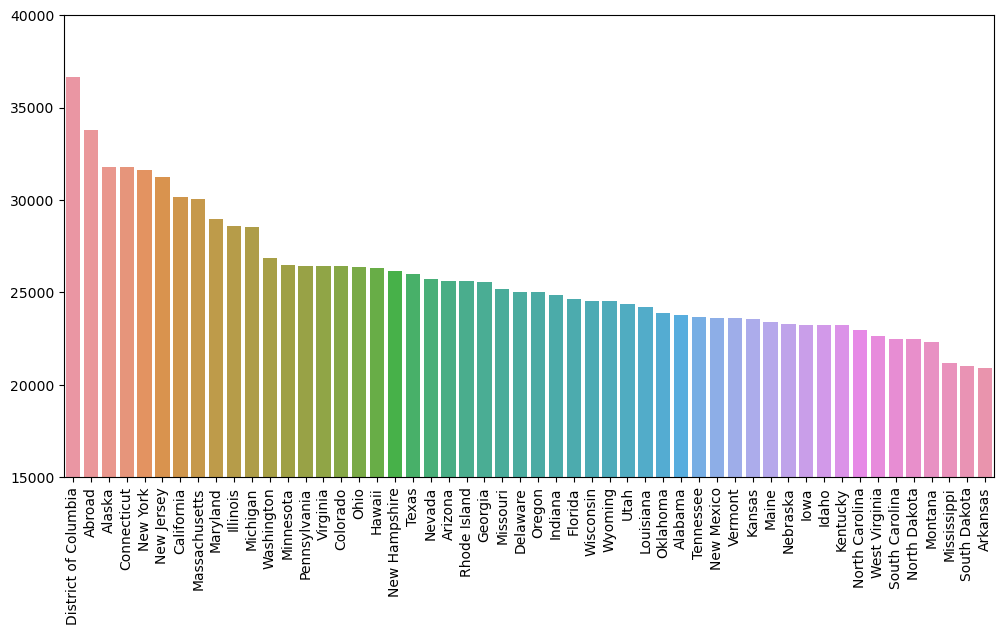

In [68]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['POWSTATE'].values[:100].astype('str'), 
                y=gb['REARNING'].values[:100],
                orient="v")
_ = plt.xticks(rotation=90) 
plt.ylim([15000,40000])

In [70]:
gb = df[['POWSTATE', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[(gb['AGE']     > 50) & (gb['AGE'] <= 80)]

gb['count']     = gb['PWGT1'].astype(int)
gb['POWSTATE']  = gb['POWSTATE'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('POWSTATE').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
# gb['POWSTATE'] = gb['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False).drop(['AGE', 'PWGT1'], axis=1)

gb.head(5)

POWSTATE      REARNING    count
0                 Abroad  51299.531092     7735
9   District of Columbia  44104.269082   112460
2                 Alaska  38186.286835    28818
5             California  35806.099901  1983448
33              New York  35112.873137  1513693

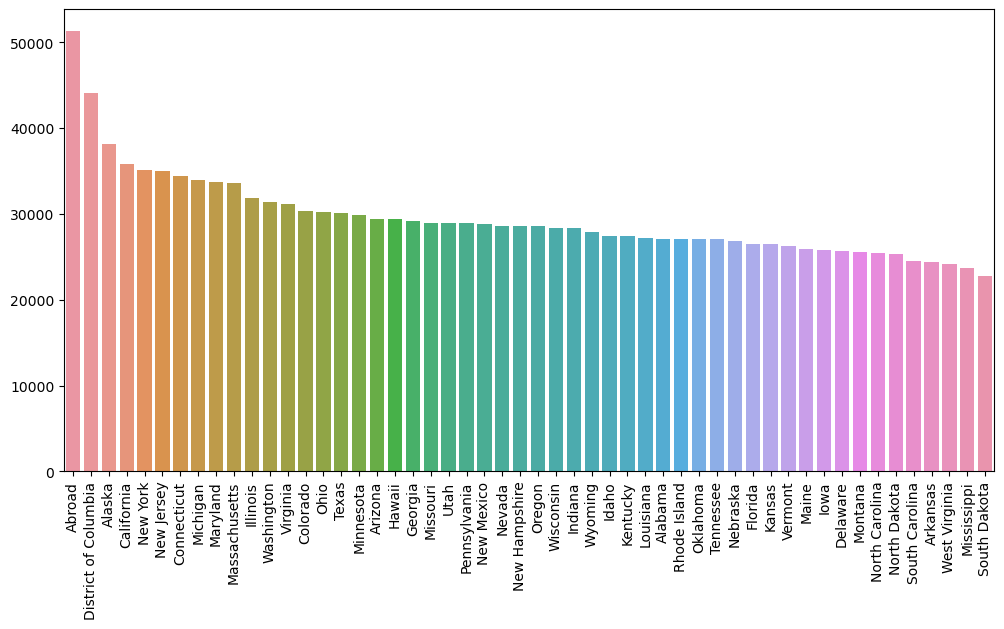

In [71]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['POWSTATE'].values.astype('str'), 
                y=gb['REARNING'].values,
                orient="v")
_ = plt.xticks(rotation=90) 

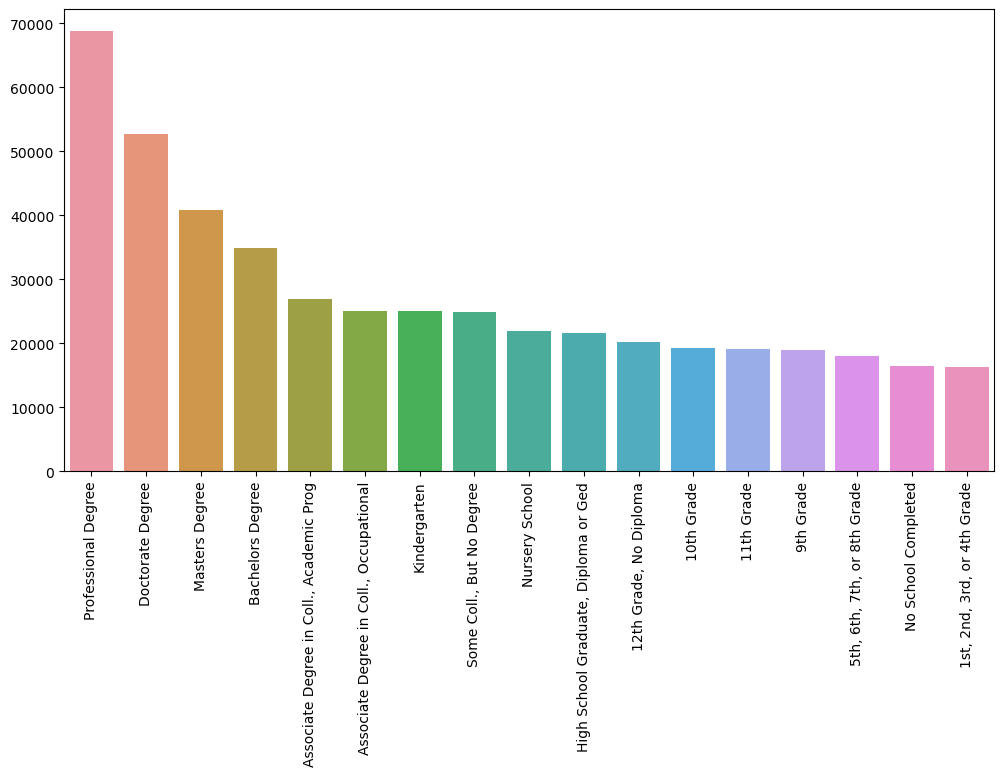

In [72]:
gb = df[['YEARSCH', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[gb['AGE']      > 18]

gb['count']     = gb['PWGT1'].astype(int)
gb['YEARSCH']   = gb['YEARSCH'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('YEARSCH').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
gb['YEARSCH']  = gb['YEARSCH'].apply(lambda x: all_codes['YEARSCH'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False)


fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['YEARSCH'].values[:100].astype('str'), 
                y=gb['REARNING'].values[:100],
                orient="v")
_ = plt.xticks(rotation=90) 

In [73]:
import pandas as pd
import folium
from   folium.plugins import MarkerCluster
import geocoder
import json

In [75]:
states_geo = '/Users/tom.jubb/Downloads/USA_States_(Generalized).geojson'
# [f['properties']['STATE_NAME'] for f in json.load(open(states_geo,'r'))['features']]

In [76]:
df.head(1)

AGE  ...           INDUSTRY_SUM
0   43  ...  PUBLIC ADMINISTRATION

[1 rows x 59 columns]

In [78]:
df_wage = df.copy()
df_wage = df_wage[df_wage['REARNING'] > 5000]
df_wage = df_wage[(df_wage['AGE'] > 0) & (df_wage['AGE'] < 100)]

df_wage['REARNING'] = df_wage['REARNING'] * df_wage['PWGT1']
gb_wage = df_wage[['POWSTATE', 'REARNING', 'PWGT1']].groupby('POWSTATE')

df_wage = gb_wage.sum().reset_index()
df_wage['REARNING'] = df_wage['REARNING'] / df_wage['PWGT1']

# df_wage['POWSTATE'] = df_wage['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_wage = df_wage.sort_values('REARNING')

In [79]:
world_choropelth = folium.Map(location=[0, 0], 
                              tiles='Cartodb Positron',
                              zoom_start=2)

world_choropelth.choropleth(
    geo_data=states_geo,
    data=df_wage,
    columns=['POWSTATE', 'REARNING'],
    key_on='feature.properties.STATE_NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Salary ($)')

# display map
world_choropelth

/Users/tom.jubb/anaconda3/envs/dio/lib/python3.9/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### 1.3.4 Occupations

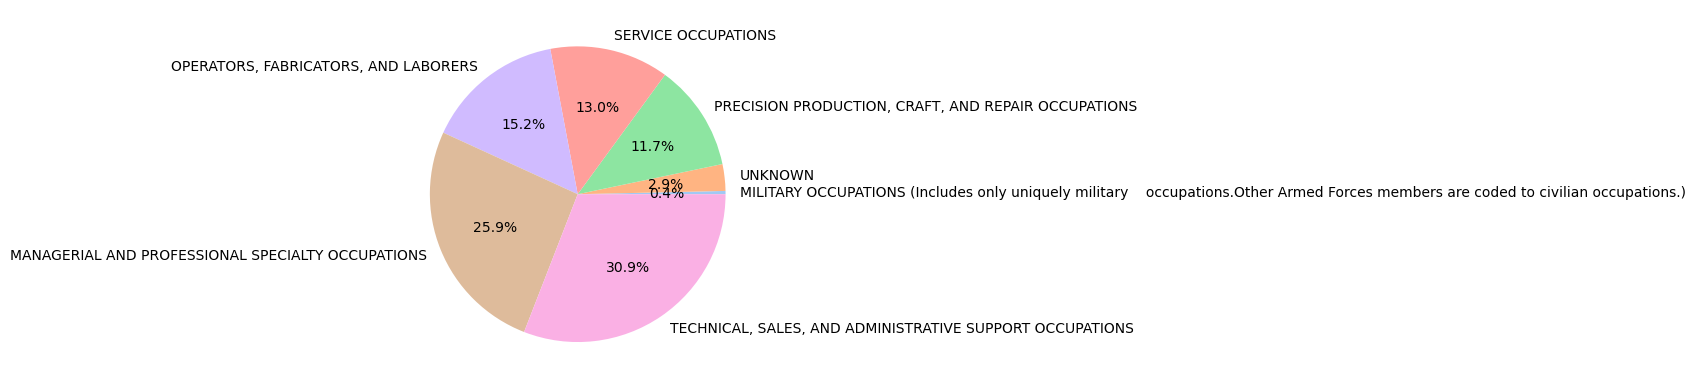

In [83]:
df_plot = df[['OCCUP','OCCUP_SUM']].groupby('OCCUP_SUM').count().reset_index()

#define data
data   = df_plot['OCCUP']
labels = df_plot['OCCUP_SUM']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

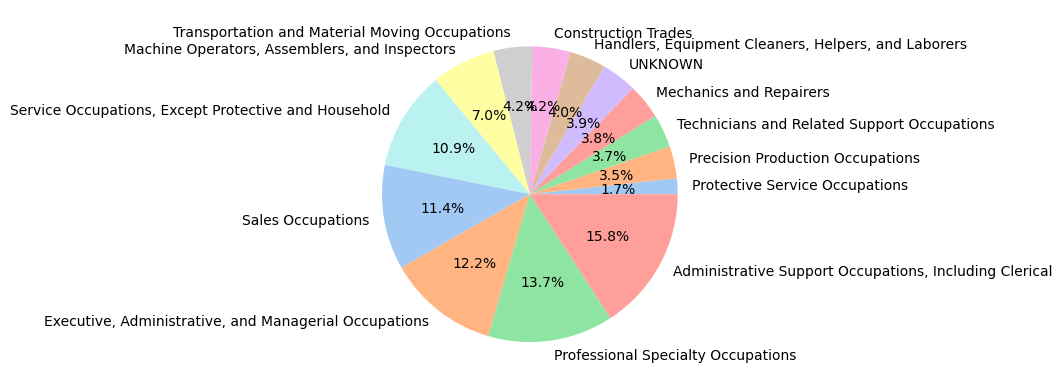

In [84]:
df_plot = df[['OCCUP','OCCUP_MAJ']].groupby('OCCUP_MAJ').count().reset_index()

#define data
data   = df_plot['OCCUP']
labels = df_plot['OCCUP_MAJ']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

In [85]:
df[['OCCUP','OCCUP_SUM']].groupby('OCCUP_SUM').count()

OCCUP
OCCUP_SUM                                                 
MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS   289945
MILITARY OCCUPATIONS (Includes only uniquely mi...    3946
OPERATORS, FABRICATORS, AND LABORERS                169955
PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPAT...  130622
SERVICE OCCUPATIONS                                 145664
TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OC...  345688
UNKNOWN                                              32637

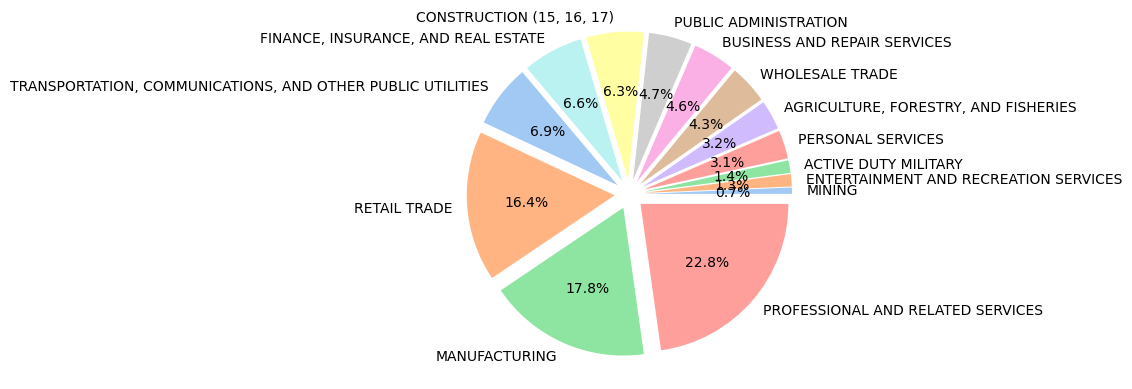

In [86]:
df_plot = df[['INDUSTRY','INDUSTRY_SUM']].groupby('INDUSTRY_SUM').count().reset_index()

#define data
data   = df_plot['INDUSTRY']
labels = df_plot['INDUSTRY_SUM']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%',explode=[0.1] * len(data))
plt.show()

### 1.3.5 Validation using external sources

Check the USA GDP using our data

In [88]:
gdp_bn_1990 = 5963 
# Share of Labour Compensation in GDP at Current National Prices for United States = 0.61 for 1990
0.61 * gdp_bn_1990

3637.43

In [89]:
# billions in wages
100 * df['REARNING'].sum() / 1e9

2542.4547032

In [286]:
tst = pd.read_csv(os.path.join(r"/Users/tom.jubb/Documents/data/us_census/",'USCensus1990raw.data.txt'), 
                 delimiter="\t", 
                 header=0, 
#                  nrows=100000, 
                 dtype=str)
tst.columns = list(df_meta['Var'].values)

In [287]:
# The USCensus1990raw data set contains a one percent sample of the Public Use Microdata Samples (PUMS) person records drawn from the full 1990 census sample.
(250000000 / tst.shape[0])*tst['RPINCOME'].astype(float).sum() / 1e9

3440.7207820577282

In [248]:
# military size : should be 2M
(1640/137970)*250000000

2971660.505907081

### 1.3.6 Where is there the largest wage discrpenancy based on race?

In [421]:
import pandas as pd
import folium          #  folium libraries
from   folium.plugins import MarkerCluster

try:
    import geocoder    #  geocoder
except:
    ! pip install geocoder
    import geocoder    #  geocoder
import json

states_geo = '/Users/tom.jubb/Downloads/USA_States_(Generalized).geojson'
# [f['properties']['STATE_NAME'] for f in json.load(open(states_geo,'r'))['features']]

In [422]:
race_map ={
    'White 800 869, 971' : 'white',
}
df['RACE_BW'] = df['RACE'].apply(lambda x: race_map.get(x, 'nonwhite'))

In [423]:
df_wage = df.copy()
df_wage = df_wage[(df_wage['REARNING'] > 5000) & (df_wage['REARNING'] < 100000)]
# df_wage = df_wage[(df_wage['AGE'] > 20) & (df_wage['AGE'] < 80)]
df_wage = df_wage[['POWSTATE','RACE_BW', 'REARNING']].groupby(['POWSTATE','RACE_BW']).mean().reset_index()
df_wage['POWSTATE'] = df_wage['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_wage = df_wage.sort_values('REARNING')

data = {}
for state in df_wage['POWSTATE'].unique():
    df_tmp = df_wage[df_wage['POWSTATE'] == state]

    w1 = df_tmp[df_tmp['RACE_BW'] == 'white']['REARNING'].values[0]
    w2 = df_tmp[df_tmp['RACE_BW'] == 'nonwhite']['REARNING'].values[0]
    data[state] = w1/w2

In [424]:
world_choropelth = folium.Map(location=[0, 0], 
                              tiles='Cartodb Positron',
                              zoom_start=2)

world_choropelth.choropleth(
    geo_data=states_geo,
    data=data,
    columns=['POWSTATE', 'REARNING'],
    key_on='feature.properties.STATE_NAME',
    fill_color='Reds',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Salary Ratio White/Non-White')

# display map
world_choropelth 

/Users/tom.jubb/anaconda3/envs/dio/lib/python3.9/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [83]:
df['RACE']

array(['White 800 869, 971', 'Asian Indian 600, 982',
       'Other Race 700 799, 986 999',
       'Chinese, Except Taiwanese 605, 976', 'Black 870 934, 972',
       'Korean 612, 979', 'Filipino 608, 977',
       'Cherokee 416 422, 555 557, 562',
       'Tribe Not Specified 548, 549, 576 598 Tr', 'Japanese 611, 981',
       'Vietnamese 619, 980', 'Laotian 613', 'Cambodian 604', 'Thai 618',
       'Hawaiian 653, 654, 978',
       'Alaskan Athabaskan 000, 001, 008, 009, 0', 'Aleut 941 970, 975',
       'Eskimo 935 940, 974', 'Indonesian 610', 'Pakistani 616',
       'All Other Tribes 002 007, 010 013, 015,', 'Tlingit 017',
       'Navajo 275', 'Pueblo 229 254, 506, 573', 'Sri Lankan 617',
       'Tohono Oodham 218 222', 'Pima 217', 'Taiwanese 606, 607',
       'Apache 255 264', 'Sioux 282 312, 326, 327',
       'Shoshone 195 206, 494, 518', 'Guamanian 660, 984',
       'Chippewa 330 353, 355, 544',
       'Choctaw 226, 228, 404, 434, 520, 559',
       'All Other Asian 602, 620 652, 985',

### 1.3.7 Migration

We compare place-of-birth to place-of-work to learn about migration

In [156]:
df_2 = df.copy()
# df_2['POWSTATE'] = df_2['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
# df_2['POB']      = df_2['POB'].apply(lambda x: all_codes['POB'][str(x).zfill(3)])

df_2 = df_2[df_2['REARNING'] >= 5000]
df_2 = df_2[df_2['AGE']      >= 18]
df_2 = df_2[['POWSTATE','POB','REARNING', 'PWGT1','YEARSCH_CAT','CITIZEN', 'AGE', 'OCCUP_SUM']]

df_3 = df_2.groupby(['POWSTATE','POB']).count().reset_index()

df_wage = df_2.copy()
df_wage = df_wage[['POWSTATE','POB','REARNING']].groupby(['POWSTATE','POB']).mean().reset_index()
df_wage = df_wage.sort_values('REARNING', ascending=False)

In [157]:
df_wage['Count'] = df_wage.apply(lambda x: df_3[(df_3['POWSTATE'] == x['POWSTATE']) & 
                                                (df_3['POB']      == x['POB'])       ]['PWGT1'].values[0], axis=1)

In [158]:
df_wage

POWSTATE                       POB  REARNING  Count
315         Arizona                   Belgium  220009.0      2
3013       Michigan                    Brazil  219573.0      1
563      California                      Chad  195516.0      1
4734           Ohio                    Uganda  194958.0      1
3669         Nevada                 Australia  194911.0      1
...             ...                       ...       ...    ...
4958         Oregon                  Portugal    5000.0      1
3318    Mississippi                   Ireland    5000.0      1
5828           Utah  Northern Mariana Islands    5000.0      1
6387      Wisconsin                    Kuwait    5000.0      1
3827  New Hampshire                    Latvia    5000.0      1

[6525 rows x 4 columns]

In [159]:
# some anomalies due to single people
df_wage

POWSTATE                       POB  REARNING  Count
315         Arizona                   Belgium  220009.0      2
3013       Michigan                    Brazil  219573.0      1
563      California                      Chad  195516.0      1
4734           Ohio                    Uganda  194958.0      1
3669         Nevada                 Australia  194911.0      1
...             ...                       ...       ...    ...
4958         Oregon                  Portugal    5000.0      1
3318    Mississippi                   Ireland    5000.0      1
5828           Utah  Northern Mariana Islands    5000.0      1
6387      Wisconsin                    Kuwait    5000.0      1
3827  New Hampshire                    Latvia    5000.0      1

[6525 rows x 4 columns]

In [160]:
# high earners, excluding small sample sizes
df_wage[df_wage['Count'] > 50].sort_values('REARNING', ascending=False).head(50)

POWSTATE                            POB      REARNING  Count
4369              New York  United Kingdom, Not Specified  70866.292308     65
4268              New York                          Japan  62322.767442    129
4296              New York                      Minnesota  53027.122642    106
4650                  Ohio                          India  52993.919355     62
3052              Michigan                          India  52413.709677     62
616             California                           Iraq  51624.671642     67
1177  District of Columbia                       Illinois  50849.419355    155
607             California                        Hungary  50400.000000     81
5051          Pennsylvania                          India  49141.485294     68
1227  District of Columbia                           Ohio  48392.728571    140
1211  District of Columbia                       Missouri  48391.610169     59
4256              New York                       Illinois  48201.788991    436
1179  District of Columbia                        Indiana  48156.480769     52
727             California  United Kingdom, Not Specified  47919.050000    140
1221  District of Columbia                       New York  46898.529762    504
4261              New York                           Iran  45698.442308     52
1261  District of Columbia                      Tennessee  45427.160714     56
3992            New Jersey                       Missouri  45259.483871     62
4230              New York                          Egypt  45214.253968     63
1219  District of Columbia                     New Jersey  44991.678322    143
4253              New York                        Hungary  44925.765957     94
2919         Massachusetts                       Missouri  44693.181818     55
1146  District of Columbia                    Connecticut  44669.600000     75
1208  District of Columbia                       Michigan  44522.814433     97
1949              Illinois                       New York  44263.331349    504
4271              New York                         Kansas  43131.915493     71
1205  District of Columbia                  Massachusetts  43050.575758    132
3957            New Jersey                        Indiana  42923.376471     85
4069            New Jersey                      Wisconsin  42771.672414     58
618             California                         Israel  42746.947917     96
4283              New York                      Louisiana  42685.244681     94
4298              New York                       Missouri  42622.602740    146
957            Connecticut                        Indiana  42619.000000     53
3955            New Jersey                       Illinois  42594.258772    228
4333              New York                   Rhode Island  42338.285714    112
2703              Maryland                          India  42210.220930     86
4382              New York                      Wisconsin  41916.571429    126
545             California                      Australia  41814.940299     67
3078              Michigan                  Massachusetts  41603.424242     99
1947              Illinois                     New Jersey  41389.606936    173
1136  District of Columbia                     California  41348.739130    115
1262  District of Columbia                          Texas  41310.432099     81
4232              New York                        England  41287.581395    215
990            Connecticut                     New Jersey  41126.347826    322
1356               Florida                          India  41109.264706     68
3986            New Jersey                  Massachusetts  40960.380392    255
1965              Illinois                   Pennsylvania  40917.265207    411
4310              New York                     New Jersey  40773.445697   1952
2736              Maryland                       Missouri  40694.913580     81
3092              Michigan                       New York  40693.299

In [161]:
# what education do they have?
df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')].groupby('YEARSCH_CAT').count()['CITIZEN']

YEARSCH_CAT
10th Grade                                   1
5th, 6th, 7th, or 8th Grade                  1
9th Grade                                    1
Associate Degree in Coll., Academic Prog     6
Associate Degree in Coll., Occupational      2
Bachelors Degree                            64
Doctorate Degree                             6
High School Graduate, Diploma or Ged        16
Masters Degree                              18
No School Completed                          2
Professional Degree                          3
Some Coll., But No Degree                    9
Name: CITIZEN, dtype: int64

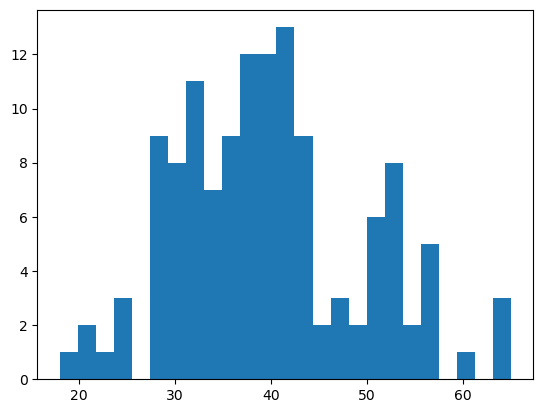

In [162]:
# How old are they?
_ = plt.hist(df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')]['AGE'], bins=25)

In [163]:
# what are they doing?
df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')].groupby('OCCUP_SUM').count()

POWSTATE  POB  ...  CITIZEN  AGE
OCCUP_SUM                                                          ...              
MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS         69   69  ...       69   69
OPERATORS, FABRICATORS, AND LABORERS                       6    6  ...        6    6
PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPAT...         3    3  ...        3    3
SERVICE OCCUPATIONS                                       11   11  ...       11   11
TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OC...        40   40  ...       40   40

[5 rows x 7 columns]

In [413]:
# TODO : Sankey the fuck out of this

df_migration = df.copy()

df_migration = df_migration[['PWGT1','POWSTATE',"MIGSTATE"]].groupby(['POWSTATE',"MIGSTATE"]).sum().reset_index()

df_migration = df_migration[(df_migration['POWSTATE'] != 0) & (df_migration['MIGSTATE'] != 0)]
# df_migration = df_migration[(df_migration['POWSTATE'] != 99) & (df_migration['MIGSTATE'] != 99)]


df_migration['POWSTATE'] = df_migration['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_migration['MIGSTATE'] = df_migration['MIGSTATE'].apply(lambda x: all_codes['MIGSTATE'][str(x).zfill(2)])

df_migration.sort_values('PWGT1', ascending=False).head(50)

POWSTATE              MIGSTATE      PWGT1
115             California            California  1779906.0
1400                 Texas                 Texas   756277.0
163             California  Other Abroad in 1985   583745.0
1032              New York              New York   512180.0
294                Florida               Florida   371532.0
442               Illinois              Illinois   287285.0
1047              New York  Other Abroad in 1985   207724.0
956             New Jersey            New Jersey   201888.0
49                 Arizona               Arizona   115846.0
701          Massachusetts         Massachusetts   110732.0
334                Florida  Other Abroad in 1985   110032.0
1408                 Texas  Other Abroad in 1985    97916.0
1228          Pennsylvania          Pennsylvania    95153.0
473               Illinois  Other Abroad in 1985    83140.0
742               Michigan              Michigan    79781.0
1128                  Ohio                  Ohio    78289.0
1535            Washington            Washington    73395.0
971             New Jersey  Other Abroad in 1985    70683.0
989             New Mexico            New Mexico    67624.0
1490              Virginia              Virginia    67059.0
212            Connecticut           Connecticut    60035.0
655               Maryland              Maryland    56546.0
168               Colorado              Colorado    53280.0
597              Louisiana             Louisiana    49005.0
345                Georgia               Georgia    47194.0
725          Massachusetts  Other Abroad in 1985    44418.0
484                Indiana               Indiana    40470.0
316                Florida              New York    37096.0
1074        North Carolina        North Carolina    36105.0
773              Minnesota             Minnesota    34709.0
1579             Wisconsin             Wisconsin    34272.0
386                 Hawaii                Hawaii    34090.0
1495              Virginia  Other Abroad in 1985    34015.0
1191                Oregon                Oregon    33296.0
682               Maryland  Other Abroad in 1985    32041.0
154             California                 Texas    32029.0
958             New Jersey              New York    30175.0
899                 Nevada                Nevada    28694.0
1030              New York            New Jersey    28357.0
283   District of Columbia  Other Abroad in 1985    26288.0
1238          Pennsylvania  Other Abroad in 1985    25194.0
832               Missouri              Missouri    25088.0
1430                  Utah                  Utah    22151.0
1539            Washington  Other Abroad in 1985    21360.0
333                Florida           Puerto Rico    20856.0
1166              Oklahoma              Oklahoma    20513.0
89                 Arizona  Other Abroad in 1985    20489.0
1350             Tennessee             Tennessee    20010.0
237            Connecticut  Other Abroad in 1985    19865.0
543                 Kansas                Kansas    19524.0